In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv('lol_data.csv')

In [3]:
pd.reset_option('^display.', silent=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = data[data['league']=='WCS']
data = data[data['patch']==10.19]
sup_data = data[data['position']=='sup']
# sup_data[sup_data['player']=='CoreJJ']
sup_data


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
72988,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,9/25/2020 7:42,1,10.19,5,Blue,sup,Kaiser,MAD Lions,Pantheon,Bard,Orianna,Volibear,Shen,Ornn,2084,1,3,6,9,18,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5182,0.9213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,9714,279.6737,0.132504,562.3129,303.6852,82,2.3608,24,0.6910,15,139.0,4.0019,9404,4877,140.4127,0.114492,8955.0,NaN,51.0,47.0,4,0,0,1.4683,2039.0,2454.0,12.0,2121.0,2657.0,14.0,-82.0,-203.0,-2.0,3144.0,3317.0,21.0,3097.0,3643.0,26.0,47.0,-326.0,-5.0
72993,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,9/25/2020 7:42,1,10.19,10,Red,sup,RedBert,INTZ,Alistar,Lillia,Caitlyn,Akali,Thresh,Syndra,2084,0,0,6,8,14,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4031,0.9213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4786,137.7927,0.082157,634.7505,1429.4338,61,1.7562,17,0.4894,23,96.0,2.7639,6781,2254,64.8944,0.069905,6575.0,NaN,44.0,44.0,0,0,0,1.2668,2121.0,2657.0,14.0,2039.0,2454.0,12.0,82.0,203.0,2.0,3097.0,3643.0,26.0,3144.0,3317.0,21.0,-47.0,326.0,5.0
73000,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,9/25/2020 8:50,1,10.19,5,Blue,sup,Kaiwing,PSG Talon,Bard,Shen,Twisted Fate,Nidalee,Ornn,Pantheon,1976,1,2,1,20,27,8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.8198,1.0628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5112,155.2227,0.078282,408.9474,333.9777,41,1.2449,20,0.6073,12,100.0,3.0364,8675,4368,132.6316,0.104111,7450.0,NaN,46.0,46.0,0,0,0,1.3968,2467.0,2443.0,14.0,2438.0,2656.0,13.0,29.0,-213.0,1.0,3675.0,3934.0,26.0,3382.0,3620.0,21.0,293.0,314.0,5.0
73005,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,9/25/2020 8:50,1,10.19,10,Red,sup,Shadow,Rainbow7,Leona,Lillia,Lucian,Graves,Renekton,Olaf,1976,0,0,7,4,8,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2429,1.0628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4765,144.6862,0.074450,481.6397,744.4737,50,1.5182,16,0.4858,19,85.0,2.5810,6869,2562,77.7935,0.078499,6675.0,NaN,45.0,45.0,0,0,0,1.3664,2438.0,2656.0,13.0,2467.0,2443.0,14.0,-29.0,213.0,-1.0,3382.0,3620.0,21.0,3675.0,3934.0,26.0,-293.0,-314.0,-5.0
73012,ESPORTSTMNT03/1530972,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,9/25/2020 10:00,1,10.19,5,Blue,sup,Isles,Legacy Esports,Nautilus,Orianna,Renekton,Lucian,Jax,Ashe,2448,1,0,5,5,17,17,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4167,0.8333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6245,153.0637,0.072434,525.4167,1086.1520,66,1.6176,20,0.4902,19,107.0,2.6225,8933,3663,89.7794,0.071695,8725.

In [4]:
sup_players = sup_data.player.unique()

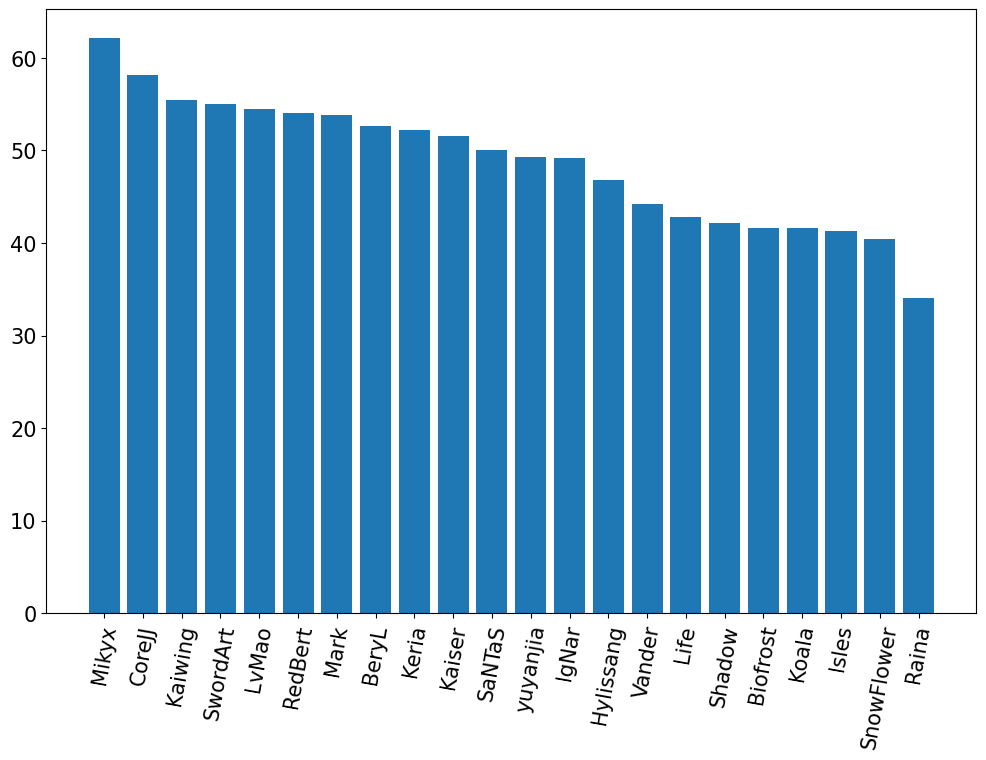

In [5]:
dict_sup = {}
kda_sup = {}
sup_sum = {}
for i in sup_players:
    df = sup_data[sup_data['player']==i]
    dict_sup[i] = []
    kda_sup[i] = []
    for index,row in df.iterrows():
        total = 0
        if row['deaths'] > 0:
            kda = (row['assists']+row['kills'])/row['deaths']
#             print(kda)
        else:
            kda = (row['assists']+row['kills'])
#             print(row['player'],row['deaths'], row['assists'], row['kills'])
#             print(kda)
        if(row['teamkills'] > 0):
            aktk = (row['assists']+row['kills'])/row['teamkills']
            if(aktk > 0.75):
                total += 25
            elif(aktk > 0.6):
                total += 15
            elif(aktk > 0.4):
                total += 5
        if(row['firstbloodassist']> 0.0):
            total += 5
        if(row['firstbloodvictim']> 0.0):
            total -= 5
        if(row['teamdeaths']>0):
            if(row['deaths']/row['teamdeaths']>0.5):
                total -= 10
        if(row['dpm'] > 150):
            total += 5
        if(row['damagemitigatedperminute'] > 200):
            total += 5
            if(row['damagemitigatedperminute'] > 500):
                total += 5
        if(row['wpm']>1.5):
            total += 5
        if(row['wcpm']>0.5):
            total += 5
        if(row['earned gpm']>75):
            total+= 5
            if(row['earned gpm']>100):
                total+= 5
        if(row['xpdiffat15'] > -300.0):
            total+= 5
            if(row['xpdiffat15'] > 400.0):
                total+= 5
        if(row['visionscore'] > 50):
            total+= 5
            if(row['visionscore'] > 80):
                total+= 10
                if(row['visionscore'] > 100):
                    total+= 5
                    if(row['visionscore'] > 130):
                        total+= 5         
        dict_sup[i].append(total)
        kda_sup[i].append(kda)
    sup_sum[i] = sum(dict_sup[i])/len(dict_sup[i])
# sup_sum = sorted(sup_sum)
# print(sup_sum)
sort_sup = sorted(sup_sum.items(), key=lambda x: x[1], reverse=True)
sorted_sup = {}
for i in sort_sup:
    sorted_sup[i[0]] = i[1]
sup_sum = sorted_sup
matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.bar(range(len(sup_sum)), list(sup_sum.values()), align='center')
plt.xticks(range(len(sup_sum)), list(sup_sum.keys()))
plt.xticks(rotation=80)
None      
        
        
        
        
  

In [6]:
sorted_sup.keys()

dict_keys(['Mikyx', 'CoreJJ', 'Kaiwing', 'SwordArt', 'LvMao', 'RedBert', 'Mark', 'BeryL', 'Keria', 'Kaiser', 'SaNTaS', 'yuyanjia', 'IgNar', 'Hylissang', 'Vander', 'Life', 'Shadow', 'Biofrost', 'Koala', 'Isles', 'SnowFlower', 'Raina'])

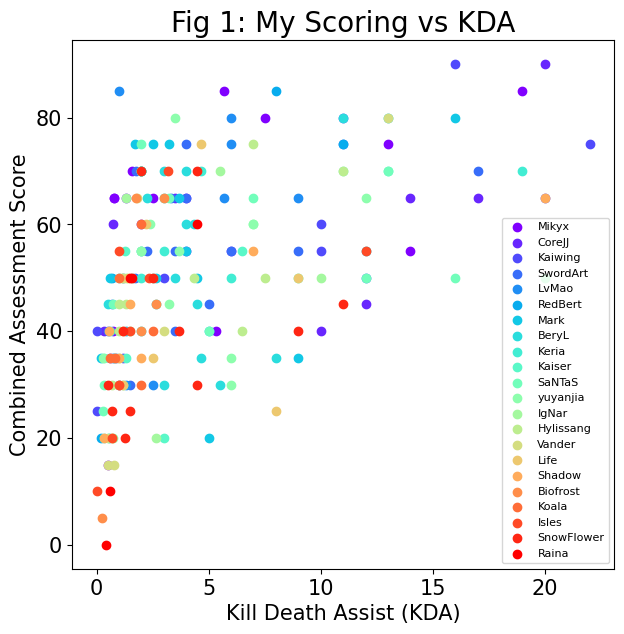

In [7]:
# dict_sup

import numpy as np
import matplotlib.cm as cm
sTier = ['Mikyx', 'CoreJJ','BeryL','LvMao']
aTier = ['SwordArt','Hylissang','Keria','Mark']
bTier = ['Kaiwing','Vander', 'Life','Kaiser', 'SaNTaS', 'yuyanjia', 'IgNar','RedBert']
cTier = ['Shadow', 'Biofrost', 'Koala', 'Isles', 'SnowFlower', 'Raina']

# x = np.arange(10)
# ys = [i+x+(i*x)**2 for i in range(22)]

players = list(sorted_sup.keys())
colors = cm.rainbow(np.linspace(0, 1, len(players)))
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_ylabel('Combined Assessment Score', fontsize = 15)
ax.set_xlabel('Kill Death Assist (KDA)', fontsize = 15)
ax.set_title('Fig 1: My Scoring vs KDA', fontsize = 20)

for target, color in zip(players, colors):
#     print(dict_sup[target])
#     print(color)
    ax.scatter(kda_sup[target],dict_sup[target],color=color, label=target)
ax.legend(loc=4, prop={'size': 8})
None

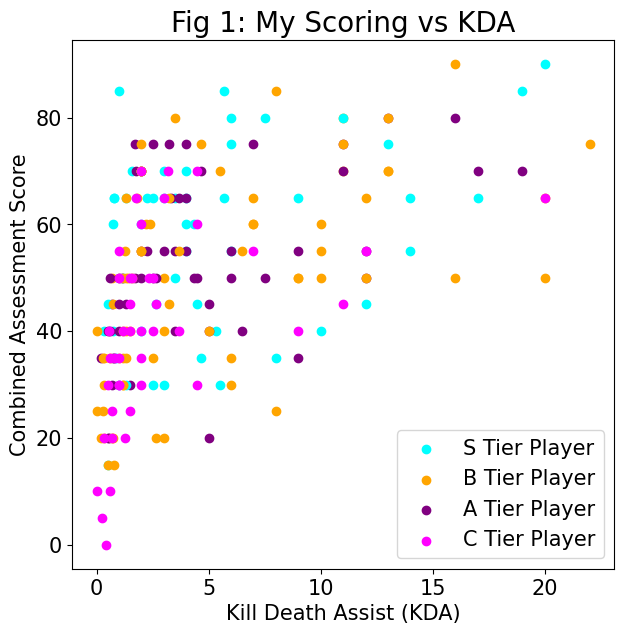

In [8]:
sTier = ['Mikyx', 'CoreJJ','BeryL','LvMao']
aTier = ['SwordArt','Hylissang','Keria','Mark']
bTier = ['Kaiwing','Vander', 'Life','Kaiser', 'SaNTaS', 'yuyanjia', 'IgNar','RedBert']
cTier = ['Shadow', 'Biofrost', 'Koala', 'Isles', 'SnowFlower', 'Raina']
colors = ['cyan','purple', 'orange','magenta']
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_ylabel('Combined Assessment Score', fontsize = 15)
ax.set_xlabel('Kill Death Assist (KDA)', fontsize = 15)
ax.set_title('Fig 1: My Scoring vs KDA', fontsize = 20)
for target in players:
#     print(target)
    if target in sTier:
        ax.scatter(kda_sup[target],dict_sup[target],color=colors[0], label='S Tier Player')
    elif target in aTier:
        ax.scatter(kda_sup[target],dict_sup[target],color=colors[1], label='A Tier Player')
    elif target in bTier:
        ax.scatter(kda_sup[target],dict_sup[target],color=colors[2], label='B Tier Player')
    else:
        ax.scatter(kda_sup[target],dict_sup[target],color=colors[3], label='C Tier Player')
from collections import OrderedDict
# import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# ax.legend(loc=4, prop={'size': 8})
# len(aTier)+len(bTier)+len(cTier)+len(sTier)
None

In [9]:
pd.reset_option('^display.', silent=True)
pd.set_option('display.max_columns', None)

data['ka'] = (data['kills'] + data['assists']) / data['teamkills']
data['kda'] = (data['kills'] + data['assists']) / data['deaths']
data['dshare'] = data['deaths']/data['teamdeaths'] 
data = data[data['position'] != 'team']

In [10]:
from sklearn.preprocessing import StandardScaler

features = ['damagetochampions', 'damageshare', 'damagetakenperminute', 'damagemitigatedperminute',
           'wardsplaced','wardskilled','controlwardsbought','visionscore','totalgold','earnedgold',
           'total cs','minionkills','monsterkills','kills','assists','deaths']
# Separating out the features
x = data.loc[:, features].values
print(x)
# Separating out the target
y = data.loc[:,['position']].values
print(y)
# Standardizing the features
x = StandardScaler().fit_transform(x)

[[4.494000e+03 6.130050e-02 5.598656e+02 ... 2.000000e+00 8.000000e+00
  0.000000e+00]
 [1.556300e+04 2.122870e-01 7.081670e+02 ... 4.000000e+00 6.000000e+00
  5.000000e+00]
 [2.314000e+04 3.156420e-01 5.647889e+02 ... 4.000000e+00 9.000000e+00
  3.000000e+00]
 ...
 [1.119900e+04 2.371310e-01 4.678073e+02 ... 2.000000e+00 0.000000e+00
  2.000000e+00]
 [8.093000e+03 1.713640e-01 4.610624e+02 ... 2.000000e+00 2.000000e+00
  4.000000e+00]
 [3.933000e+03 8.327860e-02 5.057196e+02 ... 0.000000e+00 3.000000e+00
  4.000000e+00]]
[['top']
 ['jng']
 ['mid']
 ...
 ['mid']
 ['bot']
 ['sup']]


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
pca.score(x.reshape(-1,1))

-5.709998178376132

In [13]:
data_pos = data[['position']].reset_index()

finalDf = pd.concat([principalDf, data_pos], axis = 1)
finalDf

,principal component 1,principal component 2,index,position
0,-0.278289,0.091223,72984,top
1,0.412690,0.509686,72985,jng
2,-2.839015,1.070011,72986,mid
3,-2.035831,1.400416,72987,bot
4,4.296522,2.682535,72988,sup
...,...,...,...,...
1135,-0.648595,-2.885445,75461,top
1136,0.856382,-0.491672,75462,jng
1137,-0.827351,-1.708750,75463,mid
1138,0.162468,-1.772171,75464,bot


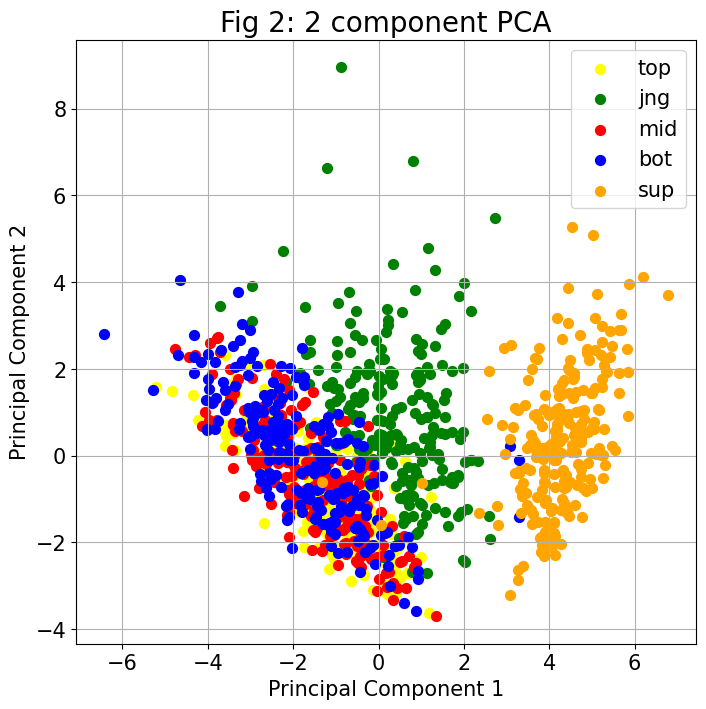

In [14]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60/
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Fig 2: 2 component PCA', fontsize = 20)
positions = ['top', 'jng', 'mid','bot','sup']
colors = ['yellow', 'g', 'r','b','orange']
for target, color in zip(positions,colors):
    indicesToKeep = finalDf['position'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(positions)
ax.grid()

In [15]:
data_mod = data[['damagetochampions', 'damagemitigatedperminute',
           'wardsplaced','wardskilled','controlwardsbought','visionscore',
           'total cs','minionkills','monsterkills']]
# finalDf.loc[finalDf['position'] == 'top','position'] = 'topmidbot'
# finalDf.loc[finalDf['position'] == 'mid','position'] = 'topmidbot'
# finalDf.loc[finalDf['position'] == 'bot','position'] = 'topmidbot'
# finalDf[finalDf['position'] ==  'bot']['position'] = 'topmidbot'
# finalDf[finalDf['position'] == 'mid']['position'] = 'topmidbot'
# finalDf.drop('index', axis = 1)
    
#         print(finalDf.iloc(index))
# finalDf = finalDf.drop('index', axis=1)

In [16]:
x

array([[-1.12462785, -1.58261391,  0.0046648 , ..., -0.25897444,
         0.50747448, -1.44852348],
       [ 0.44459168,  0.14019914,  0.68399207, ...,  0.56916262,
         0.01301217,  1.29817773],
       [ 1.51876066,  1.31951877,  0.02721706, ...,  0.56916262,
         0.75470564,  0.19949725],
       ...,
       [-0.17407975,  0.42367858, -0.41702855, ..., -0.25897444,
        -1.47037478, -0.349843  ],
       [-0.61440822, -0.32674776, -0.44792505, ..., -0.25897444,
        -0.97591247,  0.74883749],
       [-1.20415917, -1.33183548, -0.2433629 , ..., -1.0871115 ,
        -0.72868131,  0.74883749]])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr = LogisticRegression(solver = 'sag', max_iter=5000)
# data[['damagetochampions','total cs','monsterkills','damagemitigatedperminute']]
x_train, x_test, y_train, y_test = train_test_split(data[['damagetochampions','total cs','monsterkills','damagemitigatedperminute']], data['position'])

lr.fit(x_train,y_train)
predy = lr.predict(x_test)

In [18]:
lr.score(x_test,y_test)

0.7614035087719299

In [19]:
list_coef = lr.coef_

/home/samik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


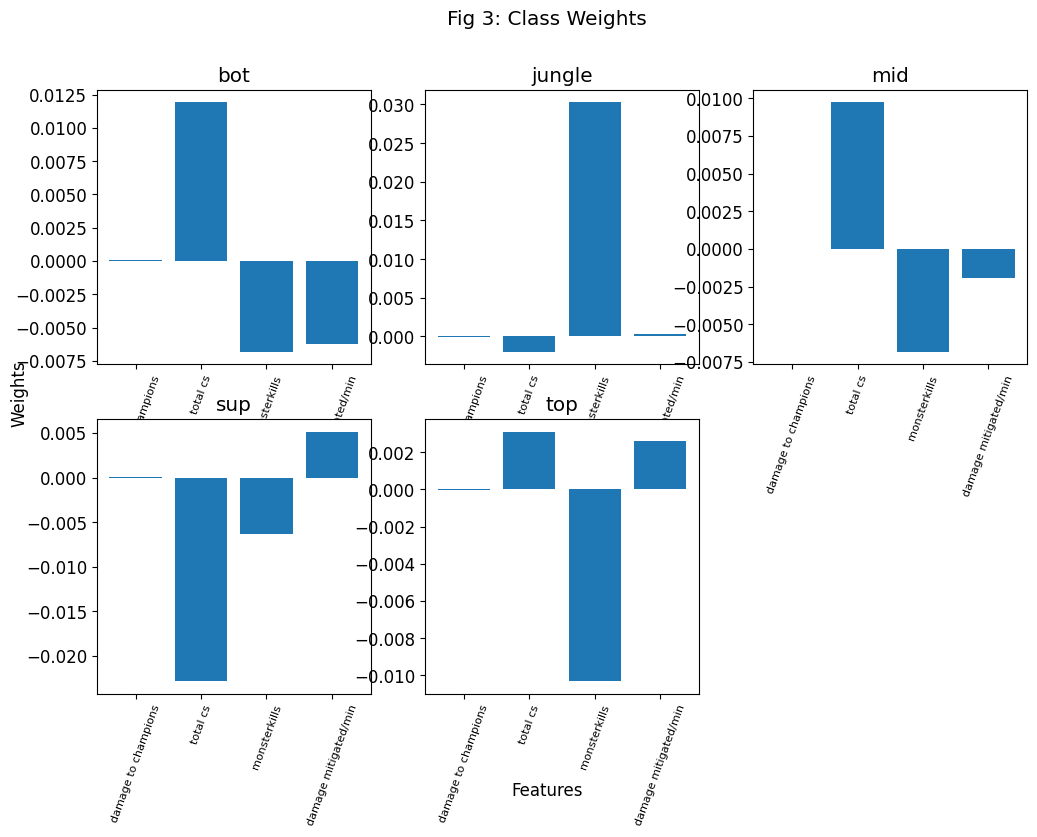

In [20]:
list_coef = list(list_coef)
coef =[]
for x in list_coef:
    coef.append(list(x))
matplotlib.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 3)
axs[0,0].bar(['damagetochampions','total cs','monsterkills','damagemitigatedperminute'],coef[0])
axs[0, 0].set_title('bot')
# axs[0,0].ylabel('features')
axs[0,1].bar(['damagetochampions','total cs','monsterkills','damagemitigatedperminute'],coef[1])
axs[0, 1].set_title('jungle')
axs[0,2].bar(['damagetochampions','total cs','monsterkills','damagemitigatedperminute'],coef[2])
axs[0, 2].set_title('mid')
# axs[0,2].set_xlabels(labels=['damage to champions','total cs','monsterkills','damage mitigated/min'], rotation=70, fontsize=8)
axs[1,0].bar(['damagetochampions','total cs','monsterkills','damagemitigatedperminute'],coef[3])
axs[1, 0].set_title('sup')
axs[1,1].bar(['damagetochampions','total cs','monsterkills','damagemitigatedperminute'],coef[4])
axs[1, 1].set_title('top')
axs[1,2].set_visible(False)
fig.text(0.5, 0.004, 'Features', ha='center', va='center')
fig.text(0.06, 0.5, 'Weights', ha='center', va='center', rotation='vertical')
fig.suptitle("Fig 3: Class Weights")
plt.rc('ytick',labelsize=8)
# for ax in axs.flat:
#     ax.set_xticklabels(labels=['dmg to champs','total cs','monsterkills','dmg mitigate/min'], rotation=70, fontsize=8)
#     ax.set_yticklabels( rotation=0, fontsize=8)
for ax in fig.get_axes():
#     ax.label_outer()
    ax.set_xticklabels(labels=['damage to champions','total cs','monsterkills','damage mitigated/min'], rotation=70, fontsize=8)

In [21]:
lr.classes_

array(['bot', 'jng', 'mid', 'sup', 'top'], dtype=object)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pipe = Pipeline([
    ("poly", PolynomialFeatures(2)), # degree 1 does nothing
    ("std", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000,multi_class='multinomial',class_weight='balanced')),
])
pipe.fit(x_train,y_train)
pipe.predict(x_test)
pipe.score(x_test,y_test)

0.7929824561403509

In [23]:
y_test

74189    top
74731    mid
74725    jng
73545    sup
73842    jng
        ... 
73347    bot
72986    mid
73208    bot
74005    jng
73371    bot
Name: position, Length: 285, dtype: object

In [24]:
from sklearn.metrics import recall_score,precision_score
recall = list(recall_score(y_test,pipe.predict(x_test), average=None))
recall

[0.7884615384615384,
 1.0,
 0.4098360655737705,
 0.9818181818181818,
 0.8070175438596491]

In [25]:
precision_score(y_test,pipe.predict(x_test), average=None)

array([0.56164384, 1.        , 0.625     , 0.98181818, 0.80701754])

In [26]:
pipe.classes_
classes = list(pipe.classes_)
classes

['bot', 'jng', 'mid', 'sup', 'top']

In [27]:
titles = pipe['poly'].get_feature_names(x_train.columns)
titles[1] = 'dmg c'
titles[2] = 'cs'
titles[3] = 'monster k'
titles[4] = 'dmg mit'
titles[5] = 'dmg c^2'
titles[6] = 'dmg c + cs'
titles[7] = 'dmg c + monster k'
titles[8] = 'dmg c + dmg mit'
titles[9] = 'cs^2'
titles[10] = 'cs + monster k'
titles[11] = 'cs + dmg mit'
titles[12] = 'monster k^2'
titles[13] = 'monster k + dmg mit'
titles[14] = 'dmg mit^2'
titles

['1',
 'dmg c',
 'cs',
 'monster k',
 'dmg mit',
 'dmg c^2',
 'dmg c + cs',
 'dmg c + monster k',
 'dmg c + dmg mit',
 'cs^2',
 'cs + monster k',
 'cs + dmg mit',
 'monster k^2',
 'monster k + dmg mit',
 'dmg mit^2']

In [28]:
list_coef = pipe.named_steps['lr'].coef_
list_coef

array([[ 0.00000000e+00,  1.16121274e-01,  2.52340811e-01,
        -9.82207021e-01, -1.72609824e+00,  1.93997333e-01,
         4.46554947e-01, -4.32524802e-01,  7.34686258e-01,
         1.17511661e+00, -9.52201079e-02, -4.47715588e-01,
         1.36872742e-02,  1.78338170e-01, -9.35575460e-01],
       [ 0.00000000e+00, -2.80401943e-01, -2.56937107e-01,
         1.62322767e+00,  3.32582137e-02, -1.92984768e-01,
        -2.80885117e-01,  7.56530810e-01, -1.34613227e-01,
        -4.32723905e-01,  9.07299602e-01, -9.31315899e-02,
         1.05367878e+00,  1.05878388e+00, -2.69862739e-02],
       [ 0.00000000e+00,  4.48184884e-01,  1.26032283e+00,
         3.91046743e-01, -1.21992332e-01,  4.87663733e-01,
        -2.93706570e-01,  6.28875028e-01, -7.70035859e-01,
         3.34444798e-01,  1.21960677e-03, -8.52652855e-02,
        -6.06893850e-01, -1.09284407e+00,  1.23130573e+00],
       [ 0.00000000e+00, -5.17885559e-01, -2.15509393e+00,
        -5.14911456e-01,  6.37618236e-01,  1.50519194

In [29]:
list_coef = list(list_coef)
coef =[]
coef_titles = []
fin = []
fin_t = []
for x in list_coef:
    coef.append(list(x))
    fin.append([])
#     coef_titles.append(titles)
    fin_t.append([])
# print(coef_titles)
for i in range(len(coef)):
    pop = []
    for x in range(len(coef[i])):
#         print(x)
        if coef[i][x] > 0.5 or coef[i][x] < -0.5:
            fin[i].append(coef[i][x])
#             print(x)
#             print(len(titles))
            fin_t[i].append(titles[x])
print(fin)
fin_t

[[-0.982207021434464, -1.726098242683272, 0.7346862579434806, 1.1751166140146547, -0.9355754597652024], [1.623227668874364, 0.7565308103849853, 0.9072996020076927, 1.0536787774995495, 1.0587838825090696], [1.2603228336283472, 0.6288750279890852, -0.770035859200824, -0.6068938499213776, -1.092844066363766, 1.2313057315845], [-0.5178855589886238, -2.1550939336204875, -0.5149114564818443, 0.6376182360549943, -0.5638196672700604, -0.6836440937378286], [0.8993673966086192, -0.5171559338148991, 1.177214125427351, -0.5037282177861793, 0.6918564074564857, -0.7555199997808871, -0.5160479519345554, 1.0807324612279914, -0.6728987671197639]]


[['monster k', 'dmg mit', 'dmg c + dmg mit', 'cs^2', 'dmg mit^2'],
 ['monster k',
  'dmg c + monster k',
  'cs + monster k',
  'monster k^2',
  'monster k + dmg mit'],
 ['cs',
  'dmg c + monster k',
  'dmg c + dmg mit',
  'monster k^2',
  'monster k + dmg mit',
  'dmg mit^2'],
 ['dmg c', 'cs', 'monster k', 'dmg mit', 'dmg c + cs', 'cs^2'],
 ['cs',
  'monster k',
  'dmg mit',
  'dmg c^2',
  'dmg c + cs',
  'dmg c + monster k',
  'cs + monster k',
  'cs + dmg mit',
  'dmg mit^2']]

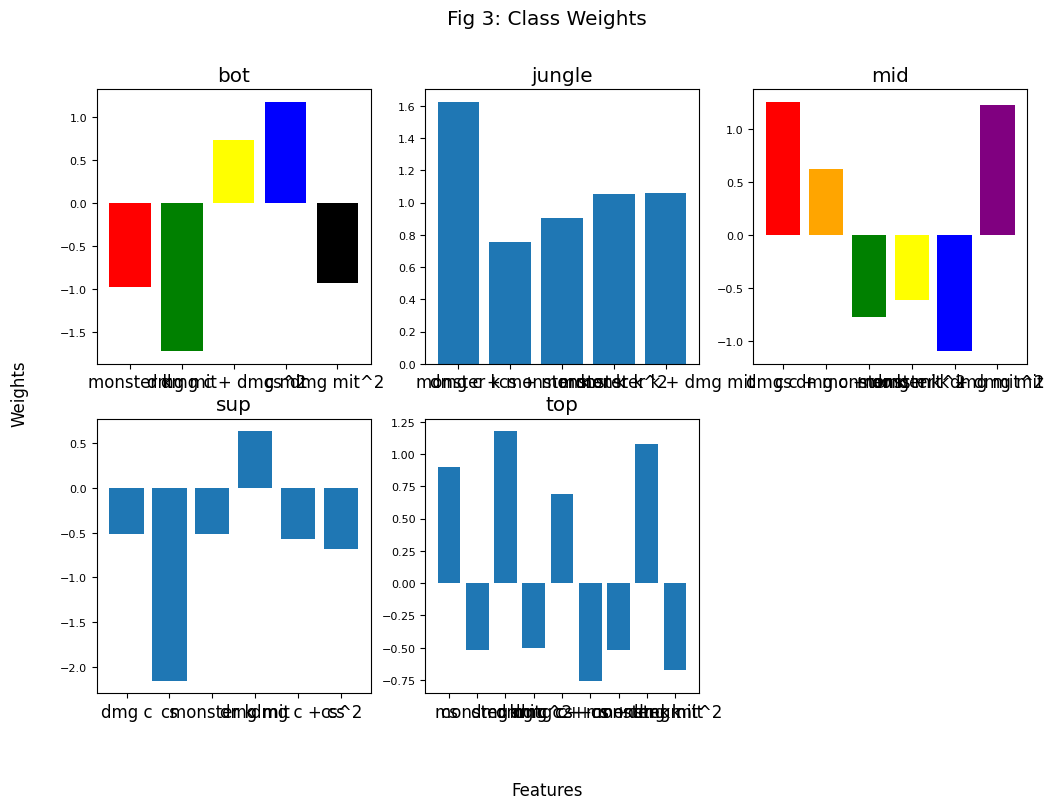

In [30]:
matplotlib.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 3)
bar = axs[0,0].bar(fin_t[0],fin[0], color=['red', 'green','yellow','blue','black'])
axs[0, 0].set_title('bot')
# axs[0,0].ylabel('features')
axs[0,1].bar(fin_t[1],fin[1])
axs[0, 1].set_title('jungle')
axs[0,2].bar(fin_t[2],fin[2],color=['red', 'orange','green','yellow','blue','purple','black'])
axs[0, 2].set_title('mid')
# axs[0,2].set_xlabels(labels=['damage to champions','total cs','monsterkills','damage mitigated/min'], rotation=70, fontsize=8)
axs[1,0].bar(fin_t[3],fin[3])
axs[1, 0].set_title('sup')
axs[1,1].bar(fin_t[4],fin[4])
axs[1, 1].set_title('top')
axs[1,2].set_visible(False)
fig.text(0.5, 0.004, 'Features', ha='center', va='center')
fig.text(0.06, 0.5, 'Weights', ha='center', va='center', rotation='vertical')
fig.suptitle("Fig 3: Class Weights")
# plt.xticks(rotation=90)
# fig.autofmt_xdate()
plt.rc('ytick',labelsize=8)
# axs[0,0].legend(shadow=True, fancybox=True)
# axs[0,2].legend(handles=fin_t[2])
# axs[0,0].set_xticklabels('hello', rotation=0, fontsize=8)
# plt.legend(handles=titles)
# for ax in fig.get_axes()
None
    

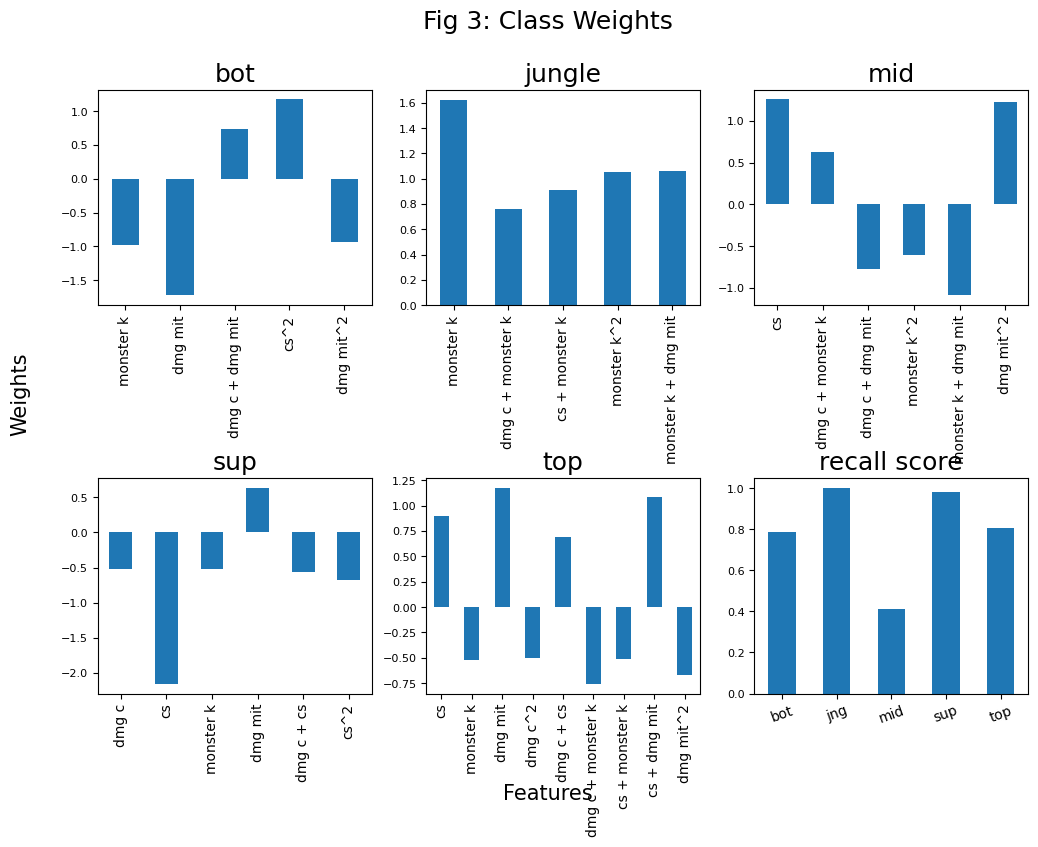

In [34]:
fig, axs = plt.subplots(2, 3)
s = pd.Series(fin[0], index=fin_t[0])
s1 = pd.Series(fin[1], index=fin_t[1])
s2 = pd.Series(fin[2], index=fin_t[2])
s3 = pd.Series(fin[3], index=fin_t[3])
s4 = pd.Series(fin[4], index=fin_t[4])
s5 = pd.Series(recall, index=classes)
s.plot.bar(ax=axs[0,0],rot=90)
s1.plot.bar(ax=axs[0,1],rot=90)
s2.plot.bar(ax=axs[0,2],rot=90)
s3.plot.bar(ax=axs[1,0],rot=90)
s4.plot.bar(ax=axs[1,1],rot=90)
s5.plot.bar(ax=axs[1,2],rot=20)
axs[0, 0].set_title('bot')
axs[0, 1].set_title('jungle')
axs[0, 2].set_title('mid')
axs[1, 0].set_title('sup')
axs[1, 1].set_title('top')
axs[1, 2].set_title('recall score')
fig.text(0.5, 0.0004, 'Features', ha='center', va='center',fontsize=15)
fig.text(0.06, 0.5, 'Weights', ha='center', va='center', rotation='vertical',fontsize=15)
plt.rcParams.update({'font.size': 15})
fig.suptitle("Fig 3: Class Weights")
plt.rc('ytick',labelsize=8)
plt.rc('xtick',labelsize=10)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
# axs[1,2].set_visible(False)
# fig.autofmt_xdate()

# axs.set_xticklabels(Rotation=45)
# plt.xticks(rotation=45)

